In [250]:
import pandas as pd
from scipy.stats import *

#seaborn 그리드 스타일
sns.set_style("whitegrid")

from datetime import datetime
np.set_printoptions(precision=6, suppress=True)
import numpy as np
from scipy import stats
# matplotlib 패키지
import matplotlib.pyplot as plt
%matplotlib inline
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정
import warnings 
warnings.filterwarnings('ignore')

In [251]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [252]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


## 데이터 불러오기 

In [253]:
busan_av=pd.read_csv('./data/2021_03~06부산.csv', thousands=',',encoding='UTF-8')
busan_bv = pd.read_csv("./data/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_av2 = pd.read_csv("./data/2021_03~06부산.csv", thousands=',', encoding='UTF-8')
busan_2020=pd.read_csv('./data/busan_movie_2020.csv', thousands=',',encoding='UTF-8')

In [254]:
busan_av=busan_av.drop(['Unnamed: 0'],axis=1)
busan_bv=busan_bv.drop(['Unnamed: 0'],axis=1)
busan_av2=busan_av2.drop(['Unnamed: 0'],axis=1)
busan_2020=busan_2020.drop(['Unnamed: 0'],axis=1)

In [255]:
# 백신전인 2020.08~2020 df 합치기
busan_bv=pd.concat([busan_2020,busan_bv]).reset_index(drop=True)

In [256]:
busan_av=busan_av.drop(0)

In [257]:
# busan_bv=busan_bv.drop(['Unnamed: 0'],axis=1)
busan_bv
busan_av

,지역,매출액,관객수,주
0,부산시,1114537230,123943,2020-08-16
1,부산시,618924290,71890,2020-08-23
2,부산시,467448880,53630,2020-08-30
3,부산시,401747560,45878,2020-09-06
4,부산시,350543860,40374,2020-09-13
5,부산시,369444420,43470,2020-09-20
6,부산시,1270147320,137503,2020-09-27
7,부산시,677889690,74197,2020-10-04
8,부산시,425792690,46497,2020-10-11
9,부산시,517480560,57976,2020-10-18


,지역,매출액,관객수,주
1,부산시,513370590,56521,2021-03-12
2,부산시,438756130,48866,2021-03-19
3,부산시,425217210,46215,2021-03-26
4,부산시,522446130,60290,2021-04-02
5,부산시,395182360,43284,2021-04-09
6,부산시,314571750,35267,2021-04-16
7,부산시,390483590,42905,2021-04-23
8,부산시,445720640,51929,2021-04-30
9,부산시,656383270,73087,2021-05-07
10,부산시,321925980,35956,2021-05-14


In [258]:
busan_bv_total= (busan_bv['매출액'])
busan_av_total=(busan_av['매출액'])

In [259]:
busan_bv.describe()
busan_av.describe()
avg_2019=2929067941

,매출액,관객수
count,30.00,30.00
mean,470270531.00,53164.63
std,269279742.76,29252.72
min,90327570.00,10890.00
25%,285195340.00,32964.00
50%,464154775.00,52624.50
75%,600548675.00,68060.00
max,1270147320.00,137503.00


,매출액,관객수
count,16.00,16.00
mean,561275536.25,61401.19
std,181666750.79,18858.24
min,314571750.00,35267.00
25%,417708497.50,45482.25
50%,517908360.00,58405.50
75%,701742617.50,75624.25
max,858280140.00,90495.00


In [260]:
5.584576e+08-1.762814e+08

382176200.0

In [261]:
tmp = []
for i in range(14):
    tmp.append(np.random.randint(382176200,739550200,dtype='int64'))
    
# 결측치 처리 더 알아보기! ! ! ! ! !*********

In [262]:
# 접종이후의 데이터가 접종 전보다 부족해서 결측치를 평균값으로 대체
busan_av_total = np.append(busan_av_total,tmp )
busan_av_total

array([513370590, 438756130, 425217210, 522446130, 395182360, 314571750,
       390483590, 445720640, 656383270, 321925980, 691293590, 814105630,
       733089700, 780069950, 679511920, 858280140, 600621813, 678611472,
       453911396, 451749440, 665629690, 701324558, 613816447, 723108920,
       713803730, 617594719, 644635681, 700872314, 648368999, 382611775],
      dtype=int64)

In [263]:
np.array(busan_bv_total)
busan_av_total

array([1114537230,  618924290,  467448880,  401747560,  350543860,
        369444420, 1270147320,  677889690,  425792690,  517480560,
        610113200,  714585170,  709390750,  615709150,  418791390,
        231147290,  179772960,  137530150,  263412500,  162778220,
        133154520,   90327570,  139130900,  381529810,  467990770,
        553603860,  571855100,  460860670,  539104860,  513370590],
      dtype=int64)

array([513370590, 438756130, 425217210, 522446130, 395182360, 314571750,
       390483590, 445720640, 656383270, 321925980, 691293590, 814105630,
       733089700, 780069950, 679511920, 858280140, 600621813, 678611472,
       453911396, 451749440, 665629690, 701324558, 613816447, 723108920,
       713803730, 617594719, 644635681, 700872314, 648368999, 382611775],
      dtype=int64)

## t검정

In [264]:
kstest(busan_av_total-busan_bv_total, 'norm')

KstestResult(statistic=0.7333333333333334, pvalue=5.088705888288546e-17)

In [265]:
ttest_rel(busan_av_total, busan_bv_total)

# 귀무가설 : 코로나 접종전과 이후의 매출액 차이가 없다

# pvalue가 0에 가까우면 귀무가설은 기각

Ttest_relResult(statistic=1.9115306706022364, pvalue=0.06586402399777479)

{'whiskers': [<matplotlib.lines.Line2D at 0x12b25431700>,
 'caps': [<matplotlib.lines.Line2D at 0x12b23dee670>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b25431d60>,
 'medians': [<matplotlib.lines.Line2D at 0x12b24002f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x12b23303130>,
 'means': []}

([<matplotlib.axis.XTick at 0x12b23463850>,
 [Text(1, 0, '백신접종이전'), Text(2, 0, '백신접종이후')])

Text(0, 0.5, '2019 평균 대비 매출액%')

<function matplotlib.pyplot.show(close=None, block=None)>

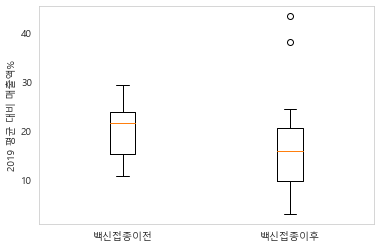

In [266]:
# 상자 그래프로 확인
plt.boxplot([
            busan_av_total/2929067941*100,
            busan_bv_total/2929067941*100
                              ])
plt.xticks([1,2],['백신접종이전','백신접종이후'])
plt.ylabel('2019 평균 대비 매출액%')  # [1,2]는 나누기정도
plt.grid()
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.show

In [267]:
# 산점도그래프
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()

<Figure size 720x432 with 0 Axes>

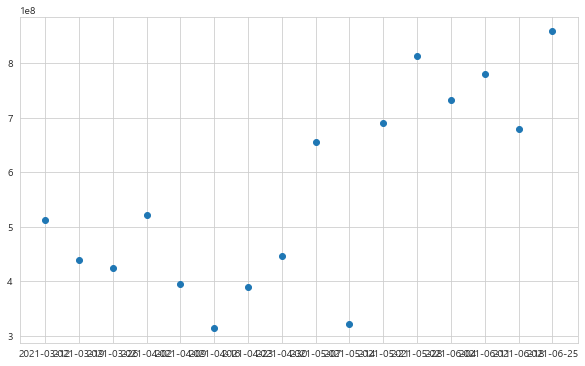

In [268]:
plt.figure(figsize=(10,6))
plt.scatter(busan_av['주'],busan_av['매출액'])

## 추가 시각화 (산점도, 회귀선)

In [269]:
busan_av['주차'] = [i for i in range(31,47)]
busan_bv['주차'] = [i for i in range(1,31)]

In [270]:
busan_bv
busan_av=busan_av.reset_index(drop=True)

,지역,매출액,관객수,주,주차
0,부산시,1114537230,123943,2020-08-16,1
1,부산시,618924290,71890,2020-08-23,2
2,부산시,467448880,53630,2020-08-30,3
3,부산시,401747560,45878,2020-09-06,4
4,부산시,350543860,40374,2020-09-13,5
5,부산시,369444420,43470,2020-09-20,6
6,부산시,1270147320,137503,2020-09-27,7
7,부산시,677889690,74197,2020-10-04,8
8,부산시,425792690,46497,2020-10-11,9
9,부산시,517480560,57976,2020-10-18,10


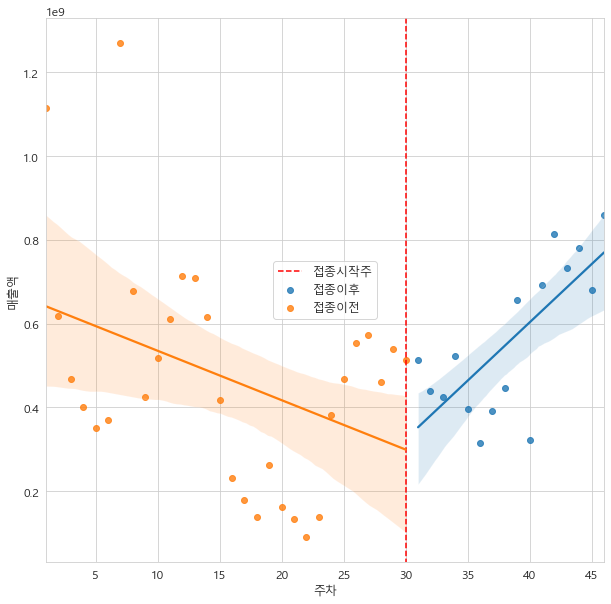

In [271]:
np.set_printoptions(precision=6, suppress=True)

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
avr_2019=2929067941
#산점도 + 회귀직선 비교

fig = plt.figure(figsize = [10,10])
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
#ax = fig.add_subplot(111)
# plt.axhline(int(avr_2019),0.05, 0.95, color = 'red', linestyle = '--',label='2019주평균' )
plt.axvline(30,1, 0, color = 'red', linestyle = '--',label='접종시작주' )

ax = sns.regplot(x='주차',y='매출액',data=busan_av,label='접종이후')
ax = sns.regplot(x='주차',y='매출액',data=busan_bv,label='접종이전')
ax.legend(loc='center')

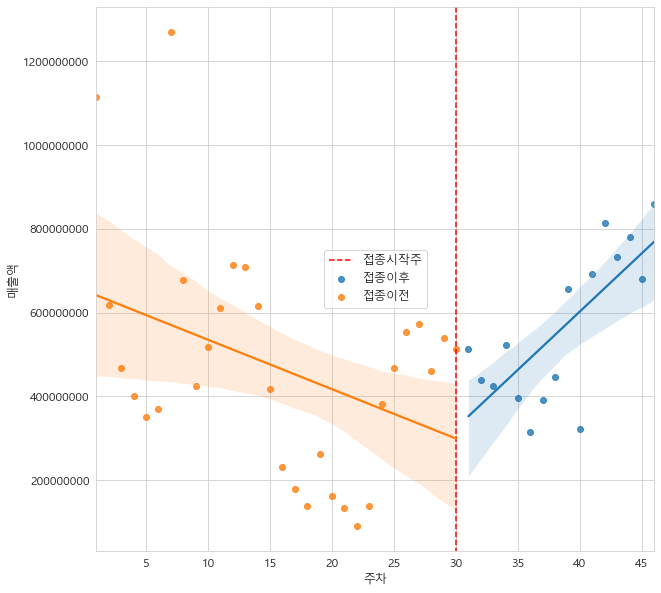

In [272]:

#산점도 + 회귀직선 비교

fig = plt.figure(figsize = [10,10])

#ax = fig.add_subplot(111)
#plt.axhline(int(avr_2019['매출액'][0]),0.05, 0.95, color = 'green', linestyle = '--',label='2019주평균' )

plt.axvline(30,1, 0, color = 'red', linestyle = '--',label='접종시작주' )

ax = sns.regplot(x='주차',y='매출액',data=busan_av,label='접종이후')
ax = sns.regplot(x='주차',y='매출액',data=busan_bv,label='접종이전')
ax.legend(loc='center')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

## 주간 접종자수-매출액 상관분석

In [273]:
fin_busan=pd.read_csv('data/부산주간백신정보.csv').drop("Unnamed: 0",axis=1)

In [274]:
fin_busan.drop('일자',axis=1)

,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,50988,0,10943,0
1,60664,62,9676,62
2,73571,245,12907,183
3,83895,2388,10324,2143
4,96082,4161,12187,1773
5,121702,4161,25620,0
6,174943,8592,53241,4431
7,223997,18249,49054,9657
8,231495,32353,7498,14104
9,233540,60033,2045,27680


In [275]:
# fin_df=pd.concat([busan_av,fin_busan],axis=1).drop('주차',axis=1)

In [276]:
pd.options.display.float_format = '{:.2f}'.format
fin_df = pd.concat([busan_av,fin_busan],axis=1).drop('주차',axis=1)

In [277]:
fin_df

,지역,매출액,관객수,주,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,부산시,513370590,56521,2021-03-12,20210318,50988,0,10943,0
1,부산시,438756130,48866,2021-03-19,20210325,60664,62,9676,62
2,부산시,425217210,46215,2021-03-26,20210401,73571,245,12907,183
3,부산시,522446130,60290,2021-04-02,20210408,83895,2388,10324,2143
4,부산시,395182360,43284,2021-04-09,20210415,96082,4161,12187,1773
5,부산시,314571750,35267,2021-04-16,20210422,121702,4161,25620,0
6,부산시,390483590,42905,2021-04-23,20210429,174943,8592,53241,4431
7,부산시,445720640,51929,2021-04-30,20210506,223997,18249,49054,9657
8,부산시,656383270,73087,2021-05-07,20210513,231495,32353,7498,14104
9,부산시,321925980,35956,2021-05-14,20210520,233540,60033,2045,27680


In [278]:
fin_df['주간접종자합계']=fin_df['주간1차접종자수']+fin_df['주간2차접종자수']
fin_df['누적접종자합계']=fin_df['1차접종누계']+fin_df['2차접종누계']


In [279]:
fin_df = fin_df[['지역','주',
                     '매출액',
                     '관객수',
                     '1차접종누계',
                     '2차접종누계',
                     '누적접종자합계',
                     '주간1차접종자수',
                     '주간2차접종자수',
                     '주간접종자합계']]

In [280]:
fin_df

,지역,주,매출액,관객수,1차접종누계,2차접종누계,누적접종자합계,주간1차접종자수,주간2차접종자수,주간접종자합계
0,부산시,2021-03-12,513370590,56521,50988,0,50988,10943,0,10943
1,부산시,2021-03-19,438756130,48866,60664,62,60726,9676,62,9738
2,부산시,2021-03-26,425217210,46215,73571,245,73816,12907,183,13090
3,부산시,2021-04-02,522446130,60290,83895,2388,86283,10324,2143,12467
4,부산시,2021-04-09,395182360,43284,96082,4161,100243,12187,1773,13960
5,부산시,2021-04-16,314571750,35267,121702,4161,125863,25620,0,25620
6,부산시,2021-04-23,390483590,42905,174943,8592,183535,53241,4431,57672
7,부산시,2021-04-30,445720640,51929,223997,18249,242246,49054,9657,58711
8,부산시,2021-05-07,656383270,73087,231495,32353,263848,7498,14104,21602
9,부산시,2021-05-14,321925980,35956,233540,60033,293573,2045,27680,29725


In [281]:
#string type을 datetime형으로 변환
busan_bv['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in busan_bv['주']]
busan_av['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in busan_av['주']]

Text(0, 0.5, '%')

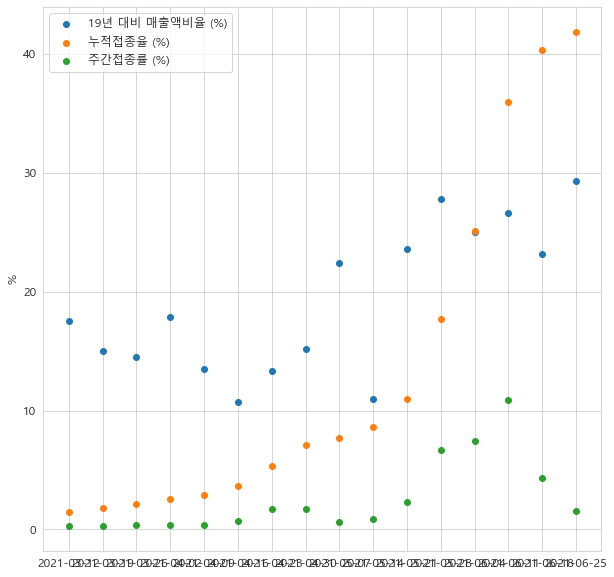

In [282]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.scatter(fin_df['주'], fin_df['매출액']/avg_2019*100 ,label='19년 대비 매출액비율 (%)')
plt.scatter(fin_df['주'], fin_df['누적접종자합계']/3410352*100 ,label='누적접종율 (%)')
plt.scatter(fin_df['주'], fin_df['주간접종자합계']/3410352*100,label='주간접종률 (%)')
plt.ylabel('%')
plt.legend(loc='best')

Text(0.5, 1.0, '매출액 , 누적접종률 산점도')

Text(0.5, 0, '매출액(억)')

Text(0, 0.5, '누적접종률(%)')

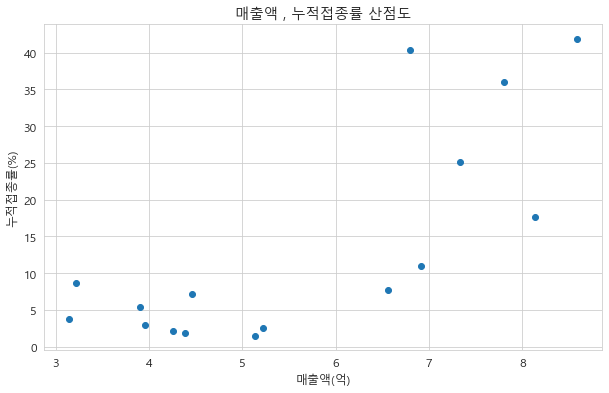

In [283]:
#누적접종률 - 2019년 대비 매출액 매출액 산점도
plt.rcParams["figure.figsize"] = (10, 6)
plt.scatter(fin_df['매출액']/100000000, fin_df['누적접종자합계']/3410352*100)
plt.title('매출액 , 누적접종률 산점도')

plt.xlabel('매출액(억)')
plt.ylabel('누적접종률(%)')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Text(0.5, 1.0, '매출액, 주간접종률 산점도')

Text(0.5, 0, '매출액(억)')

Text(0, 0.5, '주간접종률(%)')

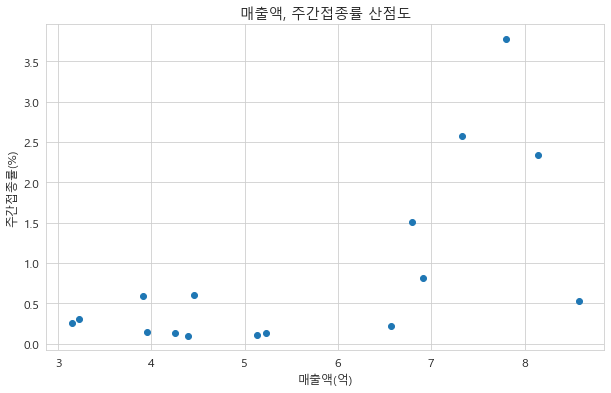

In [284]:
#주간접종률 - 2019년 대비 매출액 매출액 산점도
plt.scatter(fin_df['매출액']/100000000, fin_df['주간접종자합계']/9828094*100)
plt.title('매출액, 주간접종률 산점도')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('매출액(억)')
plt.ylabel('주간접종률(%)')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [285]:
fin_df_modi = fin_df.loc[:,['매출액','누적접종자합계','주간접종자합계']]


fin_df_modi['누적접종자합계'] = fin_df_modi['누적접종자합계']/9828094*100
fin_df_modi['주간접종자합계'] = fin_df_modi['주간접종자합계']/9828094*100

fin_df_modi.rename(columns={
                              '누적접종자합계':'누적접종률(%)',
                              '주간접종자합계':'주간접종률(%)'}, inplace = True)

In [286]:
fin_df_modi

,매출액,누적접종률(%),주간접종률(%)
0,513370590,0.52,0.11
1,438756130,0.62,0.10
2,425217210,0.75,0.13
3,522446130,0.88,0.13
4,395182360,1.02,0.14
5,314571750,1.28,0.26
6,390483590,1.87,0.59
7,445720640,2.46,0.60
8,656383270,2.68,0.22
9,321925980,2.99,0.30


array([[<AxesSubplot:xlabel='매출액', ylabel='매출액'>,
        <AxesSubplot:xlabel='누적접종률(%)', ylabel='매출액'>,
        <AxesSubplot:xlabel='주간접종률(%)', ylabel='매출액'>],
       [<AxesSubplot:xlabel='매출액', ylabel='누적접종률(%)'>,
        <AxesSubplot:xlabel='누적접종률(%)', ylabel='누적접종률(%)'>,
        <AxesSubplot:xlabel='주간접종률(%)', ylabel='누적접종률(%)'>],
       [<AxesSubplot:xlabel='매출액', ylabel='주간접종률(%)'>,
        <AxesSubplot:xlabel='누적접종률(%)', ylabel='주간접종률(%)'>,
        <AxesSubplot:xlabel='주간접종률(%)', ylabel='주간접종률(%)'>]], dtype=object)

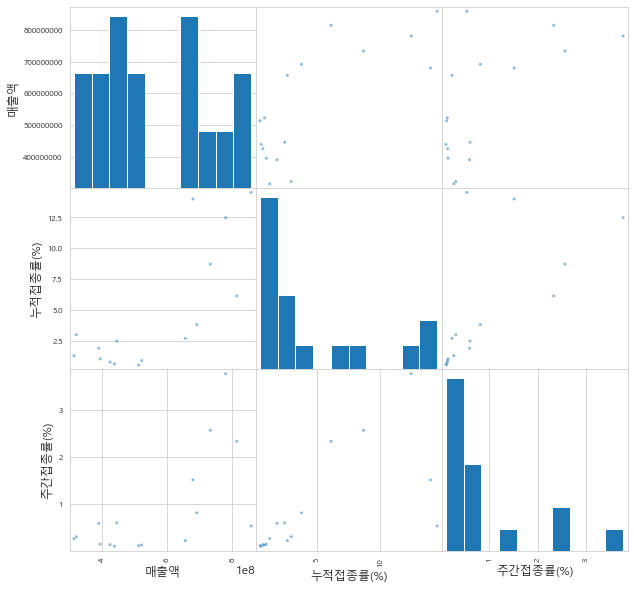

In [287]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
pd.plotting.scatter_matrix(fin_df_modi)

In [288]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

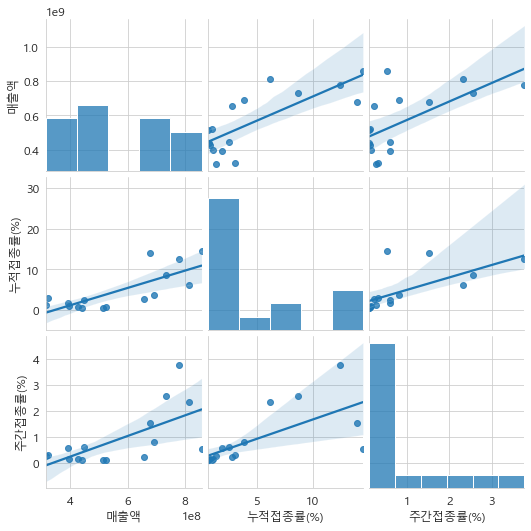

In [289]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


sns.pairplot(fin_df_modi,kind='reg')

In [290]:
pearsonr(fin_df_modi['매출액'],fin_df_modi['주간접종률(%)'])

# pvalue가 0.05미만이므로 유의미한 상관성이 있으며
# 상관계수가 0.65이므로 보통의 상관관계 있음

(0.652243442896062, 0.006175325270177162)

In [291]:
pearsonr(fin_df_modi['매출액'],fin_df_modi['누적접종률(%)']) 

# pvalue가 0.05 미만이므로 유의미한 상관성이 있으며
# 상관계수가 0.77이므로, 아주 강한 상관관계가 있다고 볼 수 있다.

(0.7704029130695069, 0.00047926863271377876)

## 상관행렬

In [292]:
import numpy as np
mat = np.zeros_like(fin_df_modi.corr(method = 'pearson'))

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

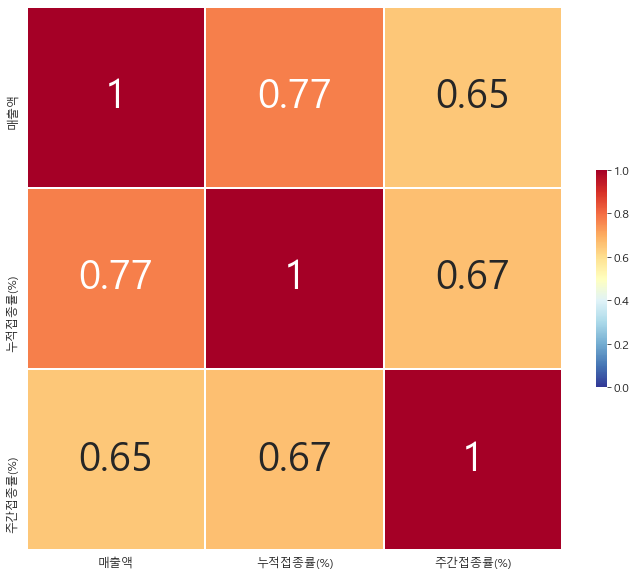

In [297]:
plt.figure(figsize=(12,10))
sns.heatmap(fin_df_modi.corr(method = 'pearson'),
            vmin = 0, vmax = +1, 
            annot = True, 
            cmap = 'RdYlBu_r', 
            linewidths=1,
            annot_kws={"size": 40},
            cbar_kws={"shrink": 0.4},
            mask = mat)